In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the evaluation results from CSV files (assuming you've saved results in CSV format)
model_files = ["LSTM_model_evaluation_results.csv", "logistic_regression_evaluation.csv", "naive_bayes_evaluation.csv", "random_forest_evaluation.csv"]



In [2]:
results = {}

# Load each model's results and store them in a dictionary
for file in model_files:
    model_name = file.split('_')[0]  # Assuming the file name contains the model name (e.g., 'model_1_results.csv')
    df = pd.read_csv(file)
    results[model_name] = df


C:\Users\Varshini\AppData\Local\Temp\ipykernel_20580\1669242530.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


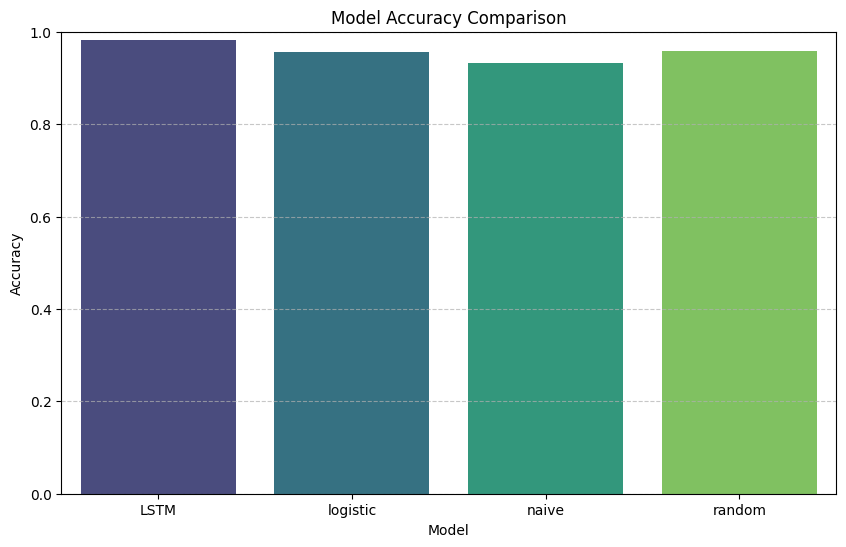

In [14]:

# Compare Accuracy across Models (Bar Plot)
accuracies = [results[model]['accuracy'][0] for model in results]
model_names = list(results.keys())

# Bar Plot for Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # since accuracy is between 0 and 1
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()




In [15]:
# Print Classification Reports
for model in results:
    print(f"\nClassification Report for {model.upper()}:\n")
    print(results[model]['classification_report'][0])


Classification Report for LSTM:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4536
           1       0.98      0.99      0.98      4274

    accuracy                           0.98      8810
   macro avg       0.98      0.98      0.98      8810
weighted avg       0.98      0.98      0.98      8810


Classification Report for LOGISTIC:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4687
           1       0.95      0.96      0.95      4249

    accuracy                           0.96      8936
   macro avg       0.96      0.96      0.96      8936
weighted avg       0.96      0.96      0.96      8936


Classification Report for NAIVE:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4687
           1       0.93      0.92      0.93      4249

    accuracy                           0.93      8936
   macro avg       0.

In [20]:
import re
support_data = {}
for file in model_files:
    model_name = file.split('_')[0]
    df = pd.read_csv(file)
    results[model_name] = df
    
    report_str = df['classification_report'][0]
    
    # Match lines like: "0       0.96      0.96      0.96      4687"
    matches = re.findall(r'^\s*(\d+)\s+[\d\.]+\s+[\d\.]+\s+[\d\.]+\s+(\d+)', report_str, re.MULTILINE)
    
    if matches:
        support_values = [int(m[1]) for m in matches]
        support_data[model_name] = support_values
    else:
        support_data[model_name] = [0, 0]  # fallback if parsing fails


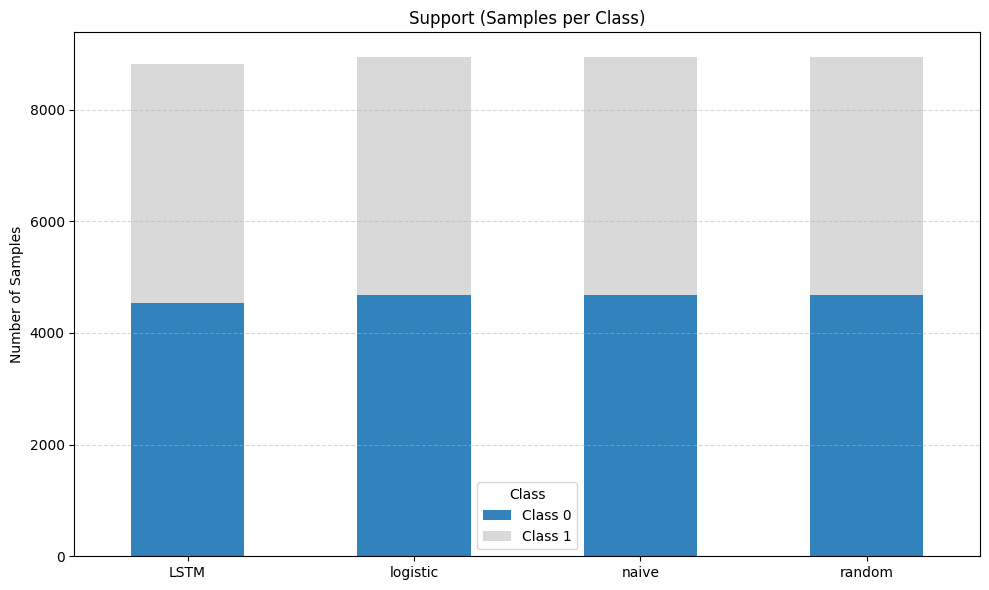

In [21]:
support_df = pd.DataFrame(support_data, index=["Class 0", "Class 1"]).T

# Plot
support_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title("Support (Samples per Class)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.legend(title="Class")
plt.tight_layout()
plt.show()

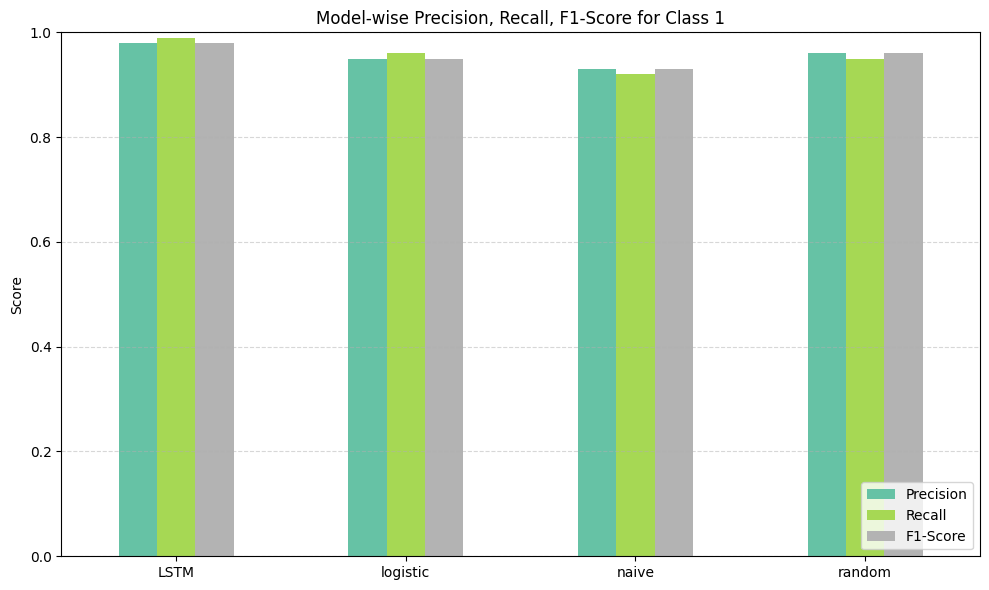

In [22]:
# Extract precision, recall, f1-score for Class 1 (you can adjust for Class 0 if needed)
precision_data = {}
recall_data = {}
f1_data = {}

for model in results:
    report_str = results[model]['classification_report'][0]
    
    # Match lines like: "1       0.95      0.96      0.95      4249"
    match = re.search(r'^\s*1\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)\s+\d+', report_str, re.MULTILINE)
    if match:
        precision_data[model] = float(match.group(1))
        recall_data[model] = float(match.group(2))
        f1_data[model] = float(match.group(3))
    else:
        precision_data[model] = 0
        recall_data[model] = 0
        f1_data[model] = 0

# Create DataFrame
metrics_df = pd.DataFrame({
    'Precision': precision_data,
    'Recall': recall_data,
    'F1-Score': f1_data
})

# Plot
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model-wise Precision, Recall, F1-Score for Class 1")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


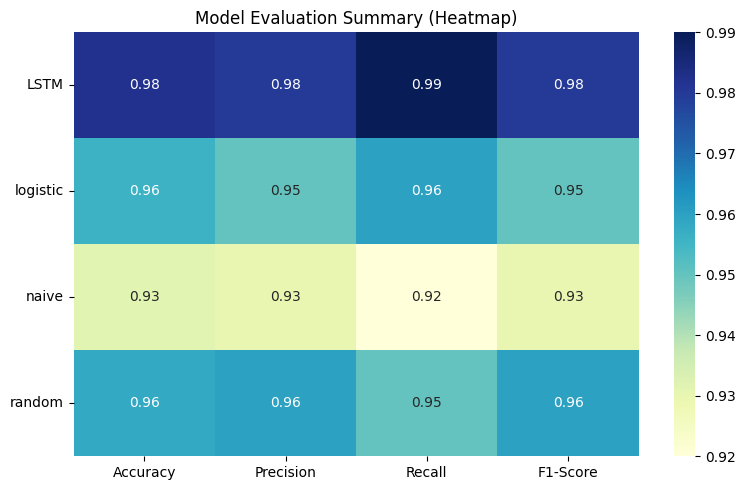

In [23]:
summary_df = pd.DataFrame({
    'Accuracy': [results[model]['accuracy'][0] for model in results],
    'Precision': precision_data.values(),
    'Recall': recall_data.values(),
    'F1-Score': f1_data.values()
}, index=results.keys())

plt.figure(figsize=(8, 5))
sns.heatmap(summary_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Model Evaluation Summary (Heatmap)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


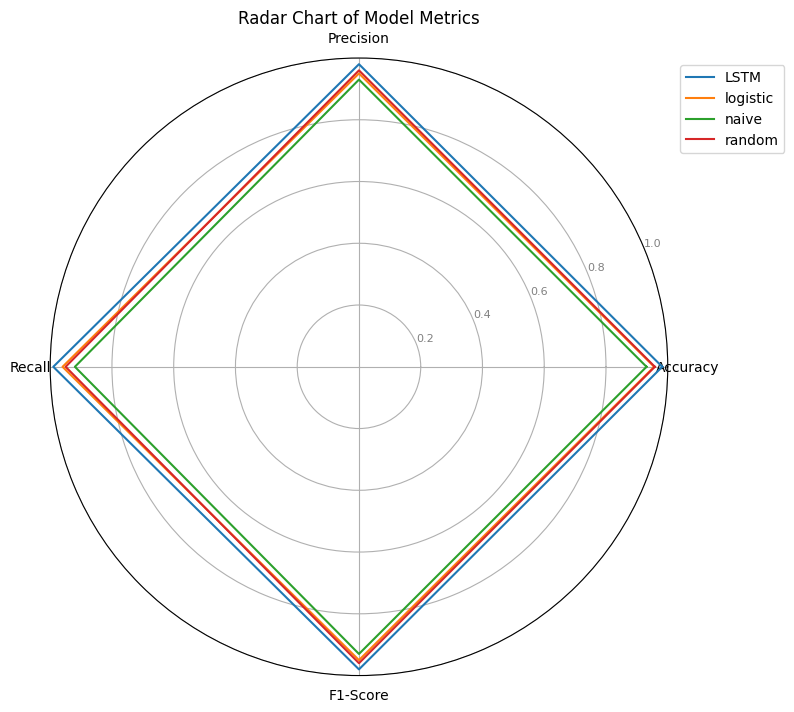

In [24]:
from math import pi

radar_df = summary_df.reset_index()
categories = list(summary_df.columns)
N = len(categories)

# Plot each model
plt.figure(figsize=(8, 8))
for i in range(len(radar_df)):
    values = radar_df.iloc[i, 1:].values.tolist()
    values += values[:1]  # repeat first value to close the radar
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.polar(angles, values, label=radar_df.iloc[i]['index'])

plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.title("Radar Chart of Model Metrics")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


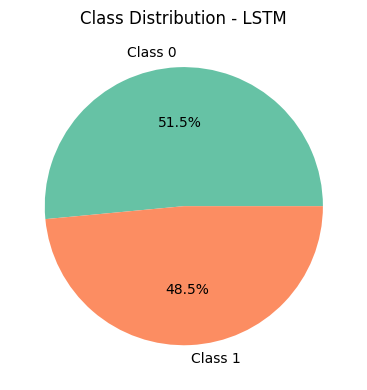

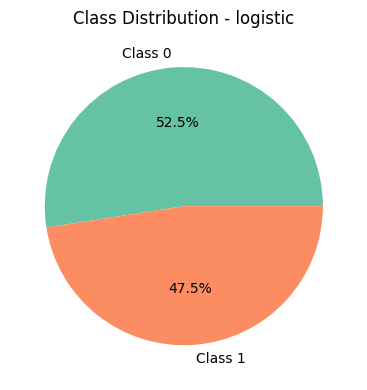

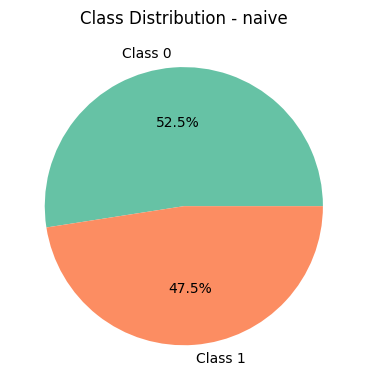

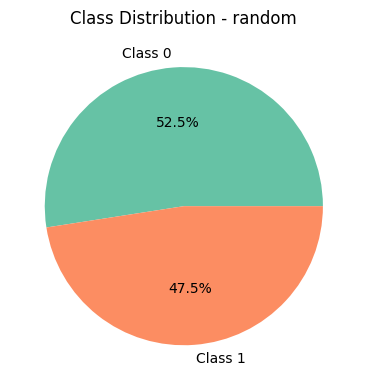

In [25]:
for model in support_data:
    plt.figure(figsize=(4, 4))
    plt.pie(support_data[model], labels=["Class 0", "Class 1"], autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
    plt.title(f"Class Distribution - {model}")
    plt.tight_layout()
    plt.show()
